# NumPy a Pandas

Tyto dvě knihovny jsou jedny z nejpoužívanějších k práci nejen s daty. Python je ale využíván i pro vývoj větších systémů, kde je potřeba zajistit, že kód nemá žádné vedlejší efekty, tak se  pro práci s daty nepoužívají vestavěné datové typy, ale datové struktury z knihovny NumPy, případně z jiných knihoven, které se na to specializují.

Například v klasickém Python listu můžeme mít různé datové struktury a typy najednou. To je strašně neefektivní pokud potřebujeme dělat jakékoliv matematické operace. Takový list zazýváme nehomogenní. NumPy má datové typy, které vám zaručí homogennost dat, které v této kolekci naleznete a proto jsou operace nad touto strukturou rychlé.

V NumPy se náhrada za Python list jmenuje Array (mimochodem, array (pole) se používá ve většine programovacích jazyků).

## N-dimenzionální pole

Než se ponoříme do práce s NumPy a Pandas, tak je dobré se rozšířit pojmy, které je dobré znát.

N-dimenzionální cokoliv, ale většinou se jedná o pole/array/list. N zastává počet dimenzí.

```python
# 1d list
one_d_list = [1, 2, 3, 4, 5, 6]

# 2d list, často také nazýván matice
two_d_list = [[1, 2, 3], [4, 5, 6]]

# 3d list najdete níže
```

In [ ]:
# N-dimenzionální pole je možné i generovat náhodně, pomoci funce z knihovny NumPy
import numpy as np

print(f"1d pole: {np.random.randn(6)}")
print(f"2d pole: {np.random.randn(2, 6)}")
print(f"3d pole: {np.random.randn(2, 3, 6)}")

## Lambda

Lambda nebo také jednořádková funkce. Je to speciální zápis anonymní fuknce, které se nějak nejmenuje. Má vždy jeden parametr, pro který definujeme, co se s ním má stát.

Použití je například v Pandas u metody `assign`, která nám vytvoří automaticky počítanou hodnotu pro daný sloupec.

```python
# syntaxe zápisu lambda funkce

lambda parametr: co se má stát s parametrem
```

# Keyword argumenty ve funkcích

Při definici funkce můžeme definovat tzv. `keyword argumenty`. Z pravidla by to měly být vždy poslední argumenty v definici funkce. K čemu slouží? Funkce může mít mnoho parametrů a abychom je vždy nemusely zadávat všechny, tak si je pojmenujeme (`keyword`). Když poté chceme funkci zavolat, musíme paraterm explicitně vyjmenovat a nastavit mu hodnotu.

```python
# pseudo funkce, takto se nekreslí
def draw_triangle(a, b, c, isfilled=False, pattern=None):
  pass

# Můžeme funkci zavolat bez specifikování keyword argumentu protože už má defaultní hodnotu
draw_triangle(1, 2, 3) # vykreslí jen čáry

# Defualtní hodnotu ale můžeme zaměnit za aktuální, když při volání funkce
# použijeme tento keyword argument a hodnotu mu nastavíme
draw_triangle(1, 2, 3, isfilled=True, pattern="stripes") # vykreslí  trojúhelník, který bude vyšrafovaný
```

## NumPy datové typy

NumPy narozdíl od Pythonu nabízí více datových typů, které nám umožní mít ještě přesnější matematické výpočty, pokud potřebujeme mnoho desetinných čísel.

Jak jsme si již řekli, tak Python nám nabízí vestavěné datové typy:
- string
- int, float, complex
- bool
- set, tuple, range, dict, list

Tyto datové typy jsou dostatečné na základní operace nad daty, ale pokud je otřeba složitějších matematických operací nad desetinnými čísly, tak je dobré využít knihovny NumPy a typů z ní.
Například:
- `np.longdouble`, který je nepřesnější, co Python nabízí, ale také paměťově nejnáročnější.

Dobré je si uvědomit i limitace, které přináší reprezentace desetinných čísel počítačem.

Více informací zde [Floating Point Arithmetic: Issues and Limitations](https://docs.python.org/3/tutorial/floatingpoint.html)

In [ ]:
from math import isclose

# False - takto s desetinnými čísly není možné pracovat
print(.1 + .1 + .1 == .3)

# True - lepší způsob, jak pracovat s desetinnými čísly
print(isclose(.1 + .1 + .1, .3))


## Statistické funkce v NumPy

NumPy nabízí spoustu statistických funckí. 
- aritmetický průměr `mean` (`nanmean` ignoruje NaN hodnoty)
- vážený průměr `average`
- medián `median` (`nanmedian` ignoruje NaN hodnoty)
- odchylky
- histogram

[Odkaz na na dokumentaci](https://numpy.org/doc/stable/reference/routines.statistics.html), kde se dozvíte více k jednotlivým funkcím.

# Pandas

Jedna z nejpoužívanějších knihoven pro práci s daty. Proč tomu tak je? Pandas totiž nabízí spoustu funkcionalit, které práci s daty ulehčují. Například vlastní datové struktury jako `Series` a `Dataframe`. Podíváme se na obě, protože jsou nedílenou součástí práce s Pandas. Zároveň `Series` je podřazená `DataFrame`, a tak je potřeba je znát obě.

Jak si představit workflow s NumPy, Pandas a Matplotlib?

Máme data, která si potřebujeme rerezentovat, analyzovat, upravit v Pythonu. Pomoci Pandas si načteme `CSV` soubor, vytvoříme si z načtených dat `DataFrame`. Zpracujeme data pomoci funkcionalit, co nám Pandas nabízí. Tyto fukncionality můžeme dolpnit možnostmi, které nabízí NumPy, a provádět matematické, statistické nebo jiné operace jednoduše, bez odborné znalosti matematiky nebo statistiky. Pořád ale musíte chápat, co která funkce dělá a jaký je její use-case.

Když máme data zpracovaná, tak na řadu přichází Matplotlib. Je to knihovna, která nám poskytuje několik možností, jak vizualizovat data. Nabízí různé druhy grafů. Tyto různé druhy grafů mají specifickou potřebu formátu dat a zde se nám zase hodí Pandas, protože díky Pandas je manipulace s daty jednoduchá.

Zní to jednoduše, ale je za tím hodně práce. Nebojte se řešit věci pokus omyl. Ctrl + Z se hodí!

## Pandas - Series

Datový typ `Series` si můžeme představit jako `list` z Pythonu, ale nabízí funkcionalitu navíc. Index v `Series` nemusí být vždy jako u listu, tedy numerická řada čísel, začínající od `0`. Můžeme indexovat písmeny, nebo čím je potřeba. Cokoliv `Series` předáme jako parametr pro `index`, to bude sloužit pro indexování. Je nutné ale myslet na to, že pokud chceme mít vlastní index, je potřeba mít připravenou dostatečné množství hodnot pro index, abychom mohli zaindexovat každou hodnotu.



In [ ]:
import numpy as np
import pandas as pd

# Defulatně se index chová jako index pro pole
s = pd.Series(np.random.randn(5))
print(s)

# ale můžeme index určit sami. Je potřeba mít ale dostatečný počet hodnot
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print(s)



Objekt `Series` můžeme vytvořit i z `dictionary`. Dejme tomu, že máme jako `dictionary` uloženy data ze soutěže, kde soutěžící sbírali body.

In [ ]:
results = {
    "Patrik": 20,
    "Jana": 30,
    "Josef": 34,
    "Barbora": 33,
    "Jakub": 32
}

s = pd.Series(results)

print(s)

I v tomto případě můžem poskytnout parametru `index` vlastní hodnoty. Víme, že bylo přihlášeno 6 závodníků, ale dostavilo se jen 5, kteří opravdu závodili. Jaký bude výsledek?

In [7]:
registered = ["Patrik", "Jana", "Josef", "Daniel", "Barbora", "Jakub"]
results = {
    "Patrik": 20,
    "Jana": 30,
    "Josef": 34,
    "Barbora": 33,
    "Jakub": 32
}

s = pd.Series(results, index=registered)

print(s)

Patrik     20.0
Jana       30.0
Josef      34.0
Daniel      NaN
Barbora    33.0
Jakub      32.0
dtype: float64


Pokud máme v `index` hodnoty, pro které nemáme data, tak u nich bude `NaN`.

**NaN (not a number) je v Pandas standardní označení chybějící hodnoty.**

-----

Pokud potřebujeme z objektu `Series` dostat jen data, bez indexů a ostatních příkras, můžeme se k nim dostat pomoci vlastnosti `array` ze `Series` objektu.

In [ ]:
registered = ["Patrik", "Jana", "Josef", "Daniel", "Barbora", "Jakub"]
results = {
    "Patrik": 20,
    "Jana": 30,
    "Josef": 34,
    "Barbora": 33,
    "Jakub": 32
}

s = pd.Series(results, 
              index=registered, 
              name="Výsledky") # Pomoci parametru name si můžeme pojemenovat data při výpisu

print(s)

# Nad tímto polem můžeme zavolat další funkce, které nám nabízí Pandas.
arr = s.array
print(arr)
print(arr.mean()) # Průměrná hodnota z pole
print(arr.median()) # Medián z pole
print(arr.argmax()) # Index položky s maximální hodnotou - vrací index prvního výskytu maximální hodnoty
print(arr.argmin()) # Index položky s minimální hodnotou - vrací index prvního výskytu minimální hodnoty

# Také si toto pole můžeme z Pandas objektu převést na NumPy objekt a používat zde zase funkce, které nabízí NumPy
arr_as_numpy = s.array.to_numpy(copy=True)
print(arr_as_numpy)
for e in arr_as_numpy:
  print(e)

# Také je možnost Series objekt převést přímo na Python list
arr_as_list = s.to_list()
print(arr_as_list)

## Pandas - DataFrame

DataFrame je hlavní datová struktura Pandas. Je nadřazená `Series`. `DataFrame` můžeme chápat jako datový typ `dictionary` ale na steroidech.

Když si pomoci Pandas načtete soubor CSV, výsledek této funkce bude uložen jako `DataFrame`.

Jedná se o dvoudimenziální datovou strukturu, je to matice hodnot. Nejjednodušší bude si reprezentaci `DataFrame` představit jako Excel soubor. Sloupce jsou nějak pojmenované a každý řádek má také své číslo. To je matice. Hodnotu pak máme uloženou například na pozici `A2`.

Pokud budeme pokračovat s našimi soutěžícími, ale uděláme ze soutěže turnaj o více disciplínách, už nemůžeme použít pro reprezentaci dat objekt `Series`. Potřebujeme `DataFrame`.

In [22]:
registered = ["Patrik", "Jana", "Josef", "Daniel", "Barbora", "Jakub"]
results = {
    # Klíč slouží jako sloupec a zároveň jako název sloupce
    "Running": pd.Series(np.random.randint(1, 40, 6), index=registered),
    "Jumping": pd.Series(np.random.randint(1, 40, 6), index=registered),
    "Swimming": pd.Series(np.random.randint(1, 40, 6), index=registered),
}

df = pd.DataFrame(results)

print(df)

         Running  Jumping  Swimming
Patrik        20        9        18
Jana          13       17        12
Josef         35       14        20
Daniel        15       31        14
Barbora       25       32        30
Jakub          5       25        23


## Práce se sloupci v DataFrame

Jak už víme z předchozích lekcí, můžeme s datovými strukturami různě manipulovat.

Můžeme sloupce přidávat, mazat, počítat s nimi.

         Running  Jumping  Swimming  Result
Patrik        10        1         2      13
Jana          33        2        11      46
Josef         13       11        16      40
Daniel         5       14        29      48
Barbora       29       20        32      81
Jakub          6       25         3      34
         Running  Jumping  Result
Patrik        10        1      13
Jana          33        2      46
Josef         13       11      40
Daniel         5       14      48
Barbora       29       20      81
Jakub          6       25      34


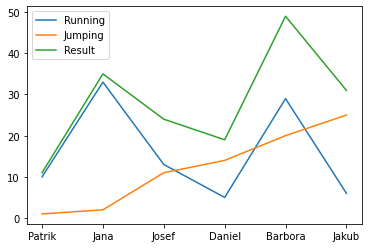

In [32]:
registered = ["Patrik", "Jana", "Josef", "Daniel", "Barbora", "Jakub"]
results = {
    # Klíč slouží jako sloupec a zároveň jako název sloupce
    "Running": pd.Series(np.random.randint(1, 40, 6), index=registered),
    "Jumping": pd.Series(np.random.randint(1, 40, 6), index=registered),
    "Swimming": pd.Series(np.random.randint(1, 40, 6), index=registered),
}

df = pd.DataFrame(results)

df["Result"] = df["Running"] + df["Jumping"] + df["Swimming"]

print(df)

df.pop("Swimming")

# Je potřeba přepočítat výsledky
df["Result"] = df["Running"] + df["Jumping"]





(
  df.query("Running > 0")
  .assign(Result=lambda x: x.Running + x.Jumping)
  .plot()
)

## Metoda `assing`

Metoda `assign` nám umožňuje vytvářet nové sloupce, kterým jako hodnotu můžeme předat přes lambda funkci. V předchozím příkladu jsme si ukázali, jak se dá vypočítat sloupec result, je to super, ale tento sloupec pak není reaktivní a nepřepočítá se, pokud nějaký sloupec z dat vymažme. Pokud jej ale přidáme pomoci metody `assign`, tak se přepočítá při každém vypsání `DataFrame`.

**Metoda vrací kopii `DataFrame` s novými sloupci.**

In [41]:
registered = ["Patrik", "Jana", "Josef", "Daniel", "Barbora", "Jakub"]
results = {
    # Klíč slouží jako sloupec a zároveň jako název sloupce
    "Running": pd.Series(np.random.randint(1, 40, 6), index=registered),
    "Jumping": pd.Series(np.random.randint(1, 40, 6), index=registered),
    "Swimming": pd.Series(np.random.randint(1, 40, 6), index=registered),
}

df_2 = pd.DataFrame(results)

df_2.assign(Result=lambda x: x.Running + x.Jumping + x.Swimming)

print(df_2) # Proč tam sloupec není? Protože jsme si neuložili návratovou hodnotu funkce assign do proměnné

res = df_2.assign(Result=lambda x: x.Running + x.Jumping + x.Swimming)
print(res)

         Running  Jumping  Swimming
Patrik        31       35        14
Jana          31       12        29
Josef         31       21        19
Daniel        25       22        36
Barbora       33        9         4
Jakub         28       36         3
         Running  Jumping  Swimming  Result
Patrik        31       35        14      80
Jana          31       12        29      72
Josef         31       21        19      71
Daniel        25       22        36      83
Barbora       33        9         4      46
Jakub         28       36         3      67


## Výpis hodnot pomoci metod `Head` a `Tail`

Funkce `print` je možný způsob, jak vypisovat hodnoty z DataFrame, ale v Google Colab můžeme využít hezkého zobrazení tabulek, když využijeme metody `head` a `tail`.

### Head
Slouží pro vypsání počtu záznmů od začátku datasetu. 

### Tail
Slouží pro vypsání počtu záznamů od konce datasetu.

**Když metodě nedáme parametr, vypisuje defaultně 5 řádků.**

## Práce s CSV

Co je `CSV`. Jedná se o textovou reprezentaci dat, jednotlivé hodnoty jsou od sebe oddělené oddělovačem. Oddělovač může být **čárka**, **středník**, **tabulátor**, aj.

Většinou CSV soubor obsahuje na prvním řádku názvy sloupců a data jsou až od druhého řádku. Výhodou je, že tento soubor otevře jakýkolik textový editor. Excel nám umožňuje CSV reprezentaci převést do klasické Excel podoby pomoci vestavěné funkcionality v záložce "Data". 

```csv
ID,Jméno,Přijmení,Věk,Email
1,Patrik,Procházka,29,
2,Jana,Procházková,24,
3,Joe,Doe,49,joedoe@email.com
```

V učebních materiálech najdete CSV soubor s daty o populaci amerických měst. Stejně tak v každém Google Colab sešitu najdete v záložce soubory, složku `sample_data`, ve které jsou nějaká vzorová data ve formátu CSV.

## Načtení CSV souboru do Pythonu

Python samotný nabízí funkcionalitu, jak pracovat se soubory ze souborového systému počítač. Tento přístup je ale zdlouhavý a v případě mnoha dat může být i neefektivní. `Pandas` nabízí funkcionalitu, která nám umožní data jednoduše nahrát a vytvořit z nich `DataFrame` se kterým můžeme ihned pracovat.

In [ ]:
import pandas as pd

data_from_csv = pd.read_csv("./sample_data/california_housing_test.csv")

print(data_from_csv)

## Operace nad řádky a sloupci

Jako dalši funkcionalitu Pandas nabízí možnost agregovat nad celým `DataFrame` nebo nad jednotlivými sloupci. Neplést prosím s metodou `assign`.

- `sum()` - metoda sečte hodnoty ve sloupci
- `mean()` - metoda vypočítá aritmetický průměr z hodnot ve sloupci

Máme možnost ale tyto metody zavolat i nad jednotlivými sloupci.

```python
df["some_colum"].sum()
df["some_colum"].mean()
# výsledek volání je hodnota pro daný sloupec
```



### Možnost určit operaci pomoci metody `agg()`.
Agregaci, kterou chceme provést, je možné také zadat pomoci metody `agg()`, které jako parametr předáme odkaz na funkci nebo název předdefinované funkce.

```python
def my_function():
  return "Bazinga!!!"

# Sum pomoci metody agg
df.agg(np.sum)
df.agg("sum")

# Mean pomoci metody agg
df.agg(np.mean)
df.agg("mean")

# Vlastní funkce
df.agg(my_function)
```

Více informací v [dokumentaci](https://pandas.pydata.org/docs/user_guide/basics.html#function-application).

### Výběr sloupců pro zpracování nebo výpis

Pokud chceme pracovat nebo vypsat jen jednotlivé sloupce, tak je můžeme definovat pomoci přístupu přes hranaté závorky a názvu sloupcu, se kterým máme v úmyslu pracovat.

```python
# Jeden sloupec ze všech
df["column_1"]

# více sloupců zároveň
df["column_1", "column_2", "column_5"]
```

### Řazení dat podle hodnot

Pandas nabízí možnost řadit hodnoty v `DataFrame` podle zvoleného sloupce.

```python
# Definujeme podle jakého sloupce chceme řadit
df1.sort_values(by="column_name")

# Můžeme řadit i nad více sloupci zároveň
df1.sort_values(by=["col_1", "col_2"])
```

Práce s chybějímící nebo `NaN` hodnotami je v řazení v Pandas v pohodě, protože nám s tím Pandas pomůže. U metody `sort_values` existuje parametr `na_position`, který určuje, kam takové hodnoty ve výsledku zařadit. Možnosti jsou na začátek nebo na konec dat. Ve výchozím nastavení je to na konec dat, ale lze přes paramater `na_position="first"` nastavit, že mají být na začátku.

```python
# Seřadí hodnoty a všechny nečíslené nebo chybějící hodnoty budou na začátku výsledku.
df1.sort_values(by="column_name", na_position="first")
```